In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Define datasets and metrics
datasets = ['real1_Abalone', 'real2_WineQuality', 'real3_CalHousing', 
           'real4_Concrete', 'real5_BreastTumor', 'real6_echoMonths', 'real7_Satellite']
metrics = ['rhat', 'test_mse', 'pi_length', 'coverage', 'train_time']

# Results directory
results_dir = Path('results')

def load_and_summarize_metric(metric):
    """Load all dataset results for a specific metric and summarize"""
    summary_data = []
    
    for dataset in datasets:
        file_path = results_dir / f"{dataset}_{metric}.csv"
        
        if file_path.exists():
            try:
                # Read CSV file
                df = pd.read_csv(file_path)
                
                # Calculate mean and standard deviation for each column
                summary_row = {}
                summary_row['Dataset'] = dataset
                
                for column in df.columns:
                    mean_val = df[column].mean()
                    std_val = df[column].std()
                    # Format as mean(std) 
                    summary_row[column] = f"{mean_val:.4f}({std_val:.4f})"
                
                summary_data.append(summary_row)
                
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    
    return pd.DataFrame(summary_data)


Summary for RHAT
                  MultiBART_Rhat_Sigma2 DefaultBART_Rhat_Sigma2 MultiBART_Rhat_RMSE DefaultBART_Rhat_RMSE
Dataset                                                                                                  
real1_Abalone            1.1096(0.0418)          1.0825(0.0470)      1.1744(0.0676)        1.3345(0.2122)
real2_WineQuality        1.2104(0.1011)          1.1451(0.0257)      1.1794(0.0633)        1.3948(0.0862)
real3_CalHousing         1.6883(0.0503)          1.7326(0.0687)      1.4561(0.1748)        1.8252(0.1761)
real4_Concrete           1.2011(0.0909)          1.5002(0.3061)      1.1897(0.0879)        1.3550(0.1785)
real5_BreastTumor        1.0098(0.0080)          1.1018(0.0285)      1.1675(0.0565)        1.9792(0.2045)
real6_echoMonths         1.0583(0.0287)          1.0850(0.0397)      1.2067(0.0916)        1.4218(0.1630)
real7_Satellite          1.8409(0.0803)          1.8427(0.1273)      1.6559(0.1577)        1.6721(0.2827)


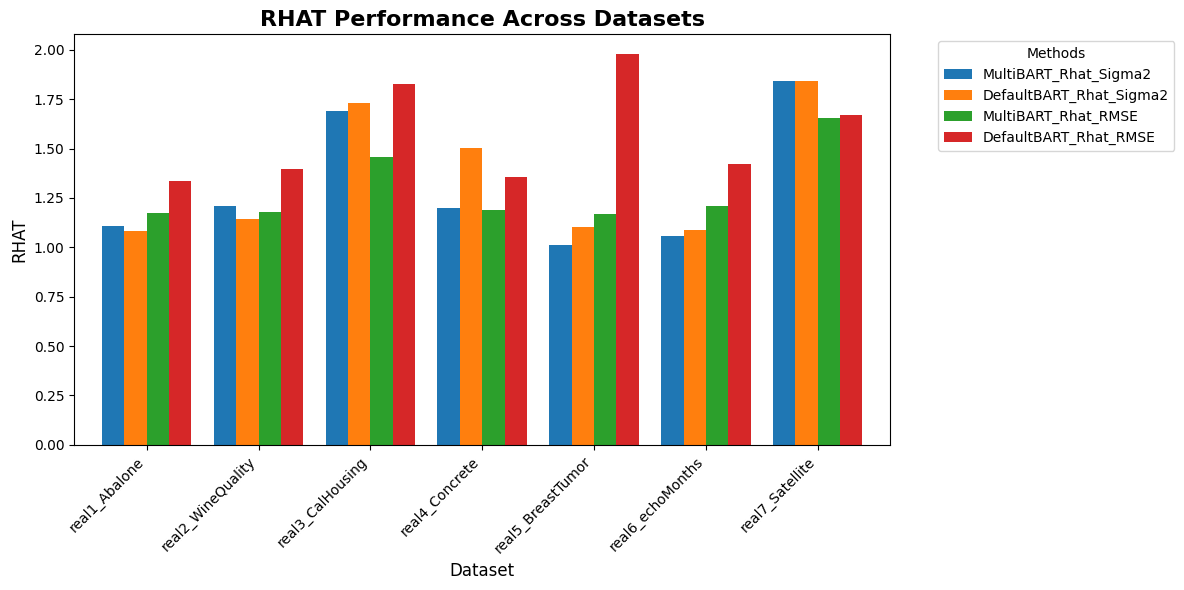


Summary for TEST_MSE
                          bart_mtmh              bart               btz               sto                rf               xgb
Dataset                                                                                                                      
real1_Abalone        5.0941(0.3712)    5.0117(0.3061)    4.9879(0.2954)    5.0280(0.3894)    4.9276(0.2921)    5.5966(0.2619)
real2_WineQuality    0.4719(0.0217)    0.4807(0.0246)    0.4837(0.0234)    0.4875(0.0246)    0.3730(0.0260)    0.4085(0.0229)
real3_CalHousing     0.2292(0.0054)    0.2603(0.0083)    0.3294(0.0088)    0.3641(0.0197)    0.2610(0.0090)    0.2213(0.0054)
real4_Concrete      19.4202(1.6584)   22.6829(2.2820)   23.4859(3.0444)   23.4950(2.4100)   25.4440(2.7678)   21.7897(4.6838)
real5_BreastTumor   87.9763(0.4572)   88.9940(0.5432)   88.5534(0.4141)   88.5556(0.4562)  110.5386(0.6099)   89.2332(0.5569)
real6_echoMonths   131.2166(2.4407)  133.1781(2.4255)  134.2188(2.2641)  135.3920(2.5084)  134.1

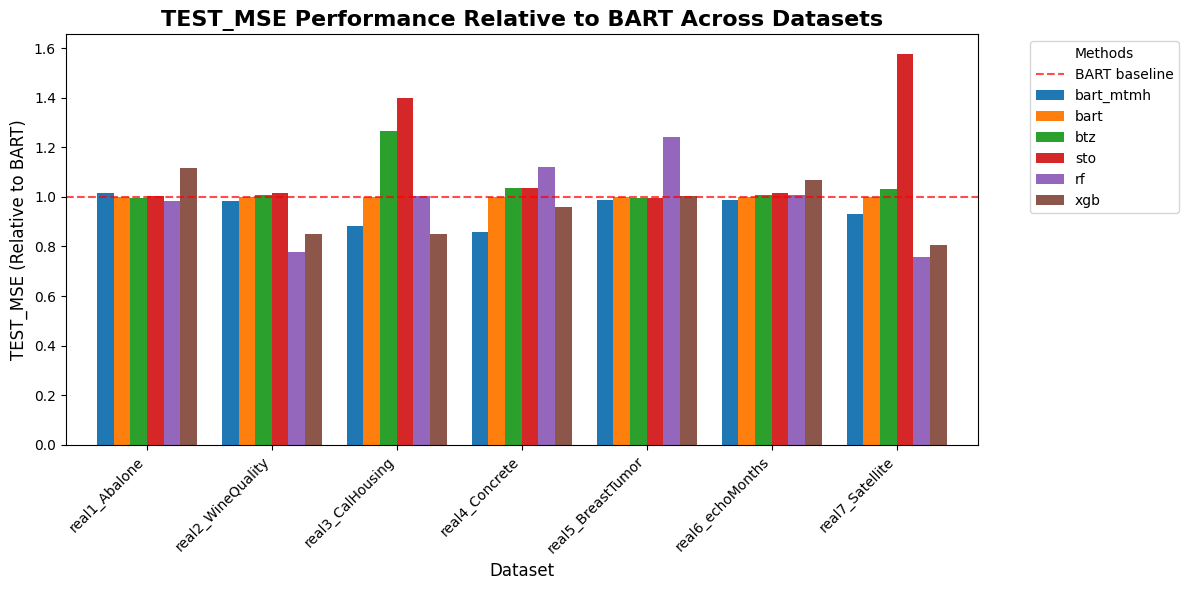


Summary for PI_LENGTH
                         bart_mtmh             bart              btz                  sto
Dataset                                                                                  
real1_Abalone       7.6591(0.1227)   7.8831(0.0906)   8.1510(0.0975)      17.7805(0.5436)
real2_WineQuality   2.4203(0.0303)   2.5266(0.0191)   2.6305(0.0267)       1.8417(0.0325)
real3_CalHousing    1.6457(0.0105)   1.8410(0.0137)   2.3216(0.0242)       1.5029(0.0605)
real4_Concrete     13.0034(0.7339)  15.6240(0.5915)  19.4284(0.7450)      72.0776(7.4844)
real5_BreastTumor  35.1998(0.0515)  35.4456(0.0451)  35.6556(0.0373)     334.4721(1.5540)
real6_echoMonths   42.3385(0.1447)  43.0231(0.1557)  43.7633(0.1530)     523.9223(6.4866)
real7_Satellite     2.2833(0.0366)   2.7545(0.0530)   3.2194(0.0428)  440.4798(1178.2900)


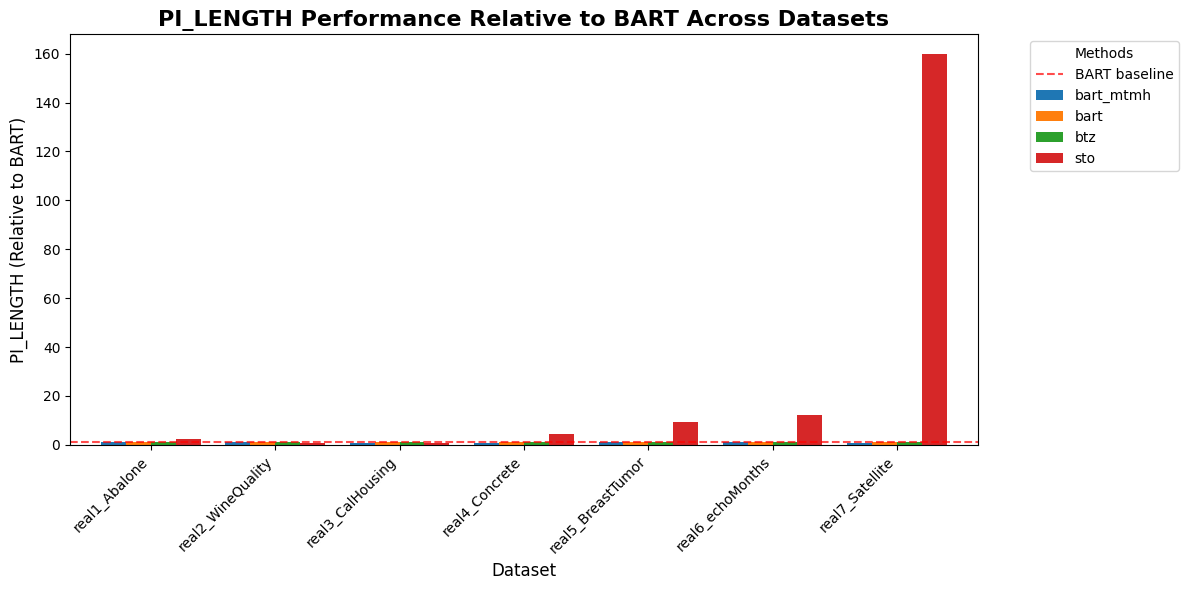


Summary for COVERAGE
                        bart_mtmh            bart             btz             sto
Dataset                                                                          
real1_Abalone      0.9147(0.0086)  0.9224(0.0069)  0.9265(0.0104)  0.9730(0.0058)
real2_WineQuality  0.9169(0.0105)  0.9243(0.0082)  0.9326(0.0069)  0.7950(0.0156)
real3_CalHousing   0.9242(0.0034)  0.9299(0.0030)  0.9444(0.0042)  0.7245(0.0137)
real4_Concrete     0.8946(0.0270)  0.9066(0.0229)  0.9500(0.0059)  0.9934(0.0063)
real5_BreastTumor  0.9211(0.0009)  0.9218(0.0012)  0.9234(0.0008)  1.0000(0.0000)
real6_echoMonths   0.9204(0.0037)  0.9224(0.0038)  0.9266(0.0048)  0.9995(0.0003)
real7_Satellite    0.8797(0.0059)  0.8979(0.0075)  0.9216(0.0056)  0.8611(0.0233)


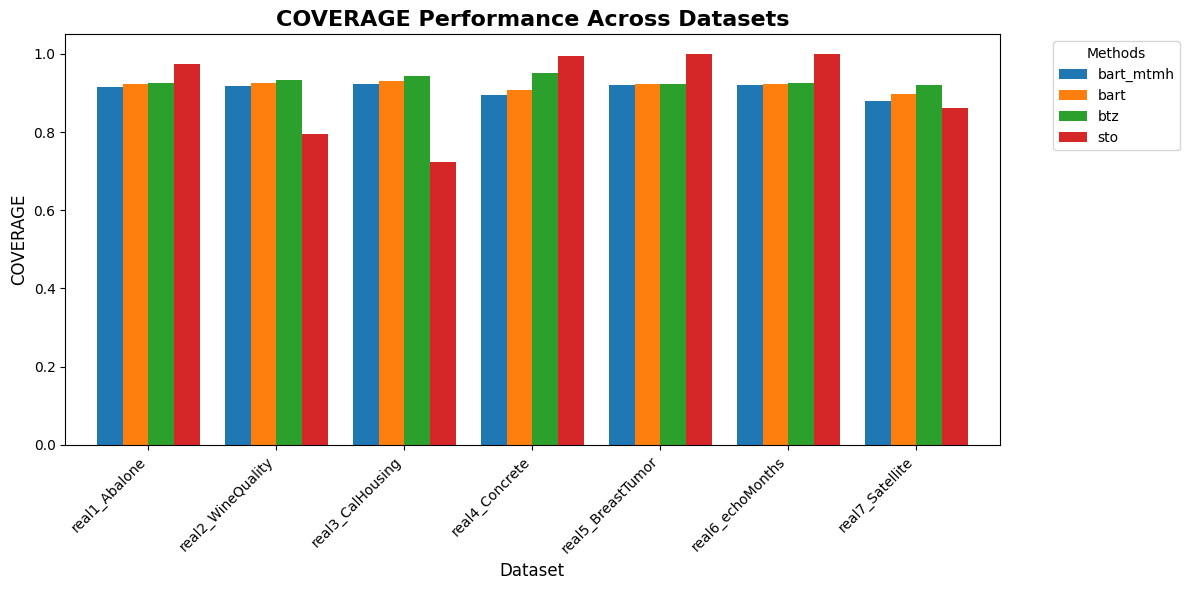


Summary for TRAIN_TIME
                          bart_mtmh             bart              btz              sto               rf             xgb
Dataset                                                                                                                
real1_Abalone       16.5721(0.5538)   1.8485(0.0431)   5.7303(0.3555)   3.4786(0.2741)   1.4192(0.0271)  0.1618(0.0295)
real2_WineQuality   22.5872(0.2775)   3.0952(0.1665)   7.2859(0.2117)   6.9761(0.2152)   3.3072(0.1211)  0.2275(0.0494)
real3_CalHousing    47.6921(0.6718)   6.0255(0.2712)   7.9739(0.4103)  16.1554(0.4395)  12.7072(0.2242)  0.2078(0.0173)
real4_Concrete       8.6265(0.5375)   1.1439(0.0501)   5.5054(0.3889)   1.1271(0.1866)   0.4144(0.0617)  0.2677(0.0860)
real5_BreastTumor  291.2405(5.9860)  33.3970(1.3638)  19.4118(2.7512)  95.8865(1.7084)  26.8963(0.3379)  0.3447(0.1680)
real6_echoMonths    44.3209(1.1448)   5.3860(0.3246)   7.6521(0.4068)  14.1206(0.2541)  10.6076(0.1155)  0.1950(0.0274)
real7_Satellite 

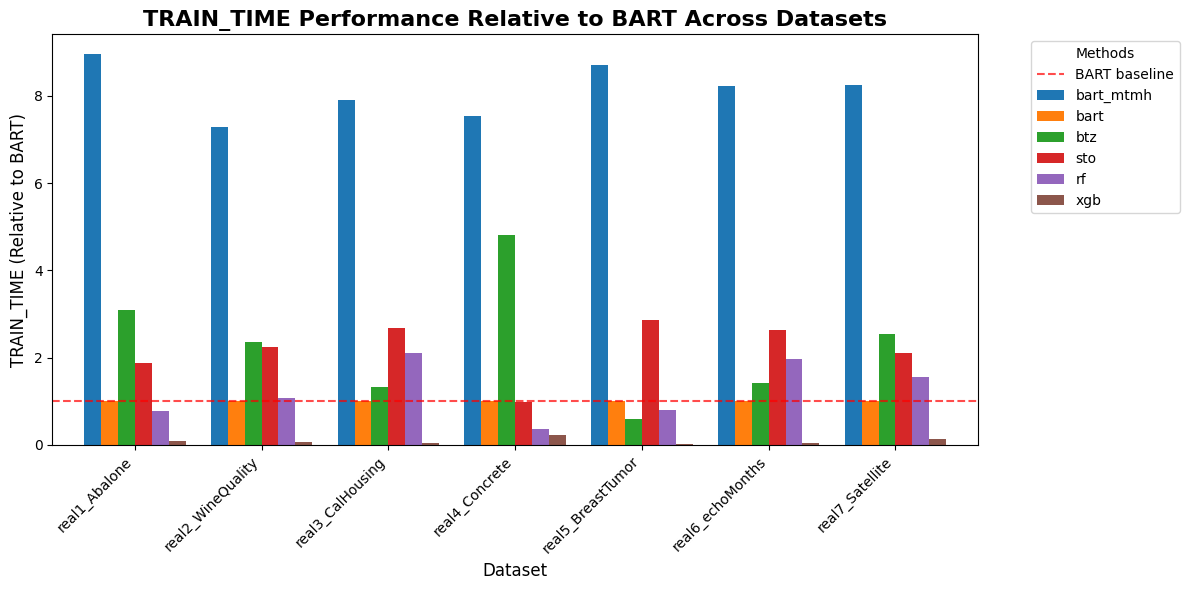

In [2]:
# Generate summary tables for each metric
import matplotlib.pyplot as plt
import seaborn as sns

for metric in metrics:
    print(f"\n{'='*50}")
    print(f"Summary for {metric.upper()}")
    print(f"{'='*50}")
    
    summary_df = load_and_summarize_metric(metric)
    
    if not summary_df.empty:
        # Set Dataset as index
        summary_df.set_index('Dataset', inplace=True)
        
        # Display table
        print(summary_df.to_string())
        
        # Create a numerical version for plotting
        plot_df = summary_df.copy()
        for col in plot_df.columns:
            # Extract mean values from "mean(std)" format
            plot_df[col] = plot_df[col].str.extract(r'(\d+\.?\d*)').astype(float)
        
        # Normalize data relative to BART performance (except for rhat and coverage)
        if metric not in ['rhat', 'coverage'] and 'bart' in plot_df.columns:
            for index in plot_df.index:
                bart_value = plot_df.loc[index, 'bart']
                if bart_value != 0:  # Avoid division by zero
                    plot_df.loc[index] = plot_df.loc[index] / bart_value
        
        # Create grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        plot_df.plot(kind='bar', ax=ax, width=0.8)
        
        # Customize the plot
        if metric not in ['rhat', 'coverage']:
            ax.set_title(f'{metric.upper()} Performance Relative to BART Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()} (Relative to BART)', fontsize=12)
            # Add horizontal line at y=1 for reference
            ax.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='BART baseline')
        else:
            ax.set_title(f'{metric.upper()} Performance Across Datasets', fontsize=16, fontweight='bold')
            ax.set_ylabel(f'{metric.upper()}', fontsize=12)
        
        ax.set_xlabel('Dataset', fontsize=12)
        ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to prevent clipping
        plt.tight_layout()
        plt.show()
        
    else:
        print(f"No data found for {metric}")